# Homework 7 - Let's have another look at the Titanic

The objective of this homework is to practice k-means clustering. To successfully complete this homework, you may use any resources available to you. 

Last week, we used supervised classification to understand what drives survivability. This week we explore whether the machine can figure it out on it's own.

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column `child` that specifies whether the person is a child (age <= 10).
    * Create a column `family_size` that specifies the size of the family of that person (Please note that there are two relevant columns for this step.
2. Develop clusters for the dataset.
    * Impute the `age` column with the **median** (Please note that this a very simplified step. Imputing is usually way more complex).
    * Drop all remaining NaN values.
    * Preprocess the `sex` column using LabelEncoder.
    * Preprocess the `child` column using LabelEncoder (not actually necessary but for systematic purposes).
    * Scale the data set to standardize the dataset using `sklearn.preprocessing.scale`
    * Run a KMeans cluster analysis. Pick an appropriate number of clusters.
    * Interpret the results.
3. Implement a search for the best number of clusters using the silhouette score from `sklearn.metrics`.
    * Set the parameters to 2,3,4,5,6 clusters.
    * Interpret the best results.
    * Try to find names for the clusters.
    
Hints:
* Explain what you are doing.
* Use references.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [63]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [228]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
%matplotlib inline

In [65]:
raw = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv")

In [7]:
tc = raw.copy()

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| **X**|
|`parch`| The number of parents or childen that are also traveling on the Titanic| **X**|
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

In [8]:
tc1 = tc.copy()

In [9]:
# create function to code child column;
# those below age 10 is equal to 1.0 and is a child

def child(x):
    if x <= 10.0000:
        return 1.0
    else:
        return 0.0

In [10]:
# apply to age column and find those who are children
tc1['child'] = tc1['age'].apply(lambda x:child(x))

In [14]:
# create and fill new column for family size
tc1['famsize'] = tc1.sibsp + tc1.parch + 1

In [125]:
# impute nan values with mean for 'age'column
tc1.age.fillna(tc1.age.mean(), inplace=True)

In [101]:
# limit dataframe to the columns we are interested in
tcc = tc1[['survived', 'pclass','sex','age', 'sibsp', 'parch', 'child', 'famsize']]
tcc.head()

,survived,pclass,sex,age,sibsp,parch,child,famsize
0,1.0,1.0,female,29.0000,0.0,0.0,0.0,1.0
1,1.0,1.0,male,0.9167,1.0,2.0,1.0,4.0
2,0.0,1.0,female,2.0000,1.0,2.0,1.0,4.0
3,0.0,1.0,male,30.0000,1.0,2.0,0.0,4.0
4,0.0,1.0,female,25.0000,1.0,2.0,0.0,4.0


In [229]:
# drop all nan values
tcc.dropna(inplace=True)

In [230]:
# preprocess these 2 columns
le = pp.LabelEncoder()
tcc['sex'] = le.fit_transform(tcc['sex'].astype(str))
tcc['child'] = le.fit_transform(tcc['sex'].astype(str))

**I want to check and see if the 'survived'column will make a difference when clustering, so I will run KMeans on two version of the dataframe, one with 'survived' column and one with out. Thus, each of the steps will be repeated twice below.**

In [231]:
# This is our dataframe with no 'survived'column
noSur = tcc.drop(['survived'],axis=1)

In [128]:
# scale the data
ptcc = pp.scale(tcc)

In [232]:
# scale this as well
ptc = pp.scale(noSur,copy=False)

In [233]:
from sklearn.metrics import silhouette_score

In [246]:
# set parameters for cluster analysis
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(ptcc)

In [247]:
# version with no 'survived'
kmeans1 = KMeans(n_clusters=3)
y_kmeans1 = kmeans.fit_predict(ptc)

In [249]:
tcc['cluster'] = y_kmeans

In [250]:
# version with no 'survived'
noSur['cluster'] = y_kmeans1

In [251]:
tcc.groupby('cluster').mean()

,survived,pclass,sex,age,sibsp,parch,child,famsize
cluster,,,,,,,,
0,0.771562,2.102564,0.000000,29.243314,0.445221,0.449883,0.000000,1.895105
1,0.196005,2.349563,1.000000,31.107748,0.243446,0.144819,1.000000,1.388265
2,0.151899,2.784810,0.531646,20.907810,3.379747,2.468354,0.531646,6.848101


In [252]:
noSur.groupby('cluster').mean()

,pclass,sex,age,sibsp,parch,child,famsize
cluster,,,,,,,
0,2.349563,1.000000,31.107748,0.243446,0.144819,1.000000,1.388265
1,2.107981,0.000000,29.230943,0.436620,0.436620,0.000000,1.873239
2,2.731707,0.512195,21.277037,3.317073,2.463415,0.512195,6.780488


** It is clear from comparing the two tables that both are the same regardless of presence of 'survived' column. From the table, we can see that cluster #0 for the first table (or cluster #1 for 2nd table) has the highest average survive rate ; this cluster of population are from the second class, female, around 29 years old, and approx. family sized of 2. The 'child' column seems to be off, as we are taking the mean.**

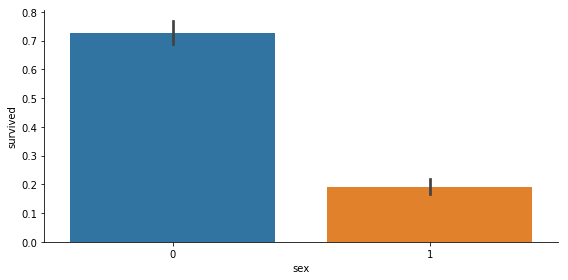

In [265]:
sns.factorplot(x='sex', y='survived',data=tcc, kind = 'bar', aspect = 2)

**Looking at the differences between the columns, we suspect 'sex' has more to do with survival rate, as this is the moste distinguishable feature between our highest and lowest average survival rate. After visualizing it, we see that this is true; majority of those who survived is indeed female.**

In [115]:
from sklearn.pipeline import Pipeline

In [ ]:
#X_complete = a.drop(['species'], axis=1)

In [116]:
# standarize data & run KMeans
pipe = Pipeline([('scale', pp.StandardScaler()),('cluster', KMeans())])

In [117]:
# this contains the cluster
pipe = Pipeline([('cluster', KMeans())])

In [121]:
cluster__n_clusters = [2,3,4,5,6]

In [147]:
# for loop to run our pipeline and display in a dataframe
score = pd.DataFrame(columns=['clusters', 'silhouette_score', 'labels'])
for n_cluster in cluster__n_clusters:
    pipe = pipe.set_params(cluster__n_clusters = n_cluster)
    labels = pipe.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    score = score.append({'clusters':n_cluster, 'silhouette_score': silhouette_avg, 'labels': labels}, ignore_index=True)

In [133]:
score.sort_values(by='silhouette_score', ascending=False)

,clusters,silhouette_score,labels
0,2,0.577424,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, ..."
3,5,0.531470,"[1, 2, 4, 0, 3, 0, 3, 3, 0, 4, 4, 2, 3, 2, 4, ..."
1,3,0.528492,"[1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, ..."
2,4,0.519830,"[2, 3, 0, 1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 3, 0, ..."
4,6,0.509647,"[3, 0, 0, 2, 4, 5, 2, 4, 2, 1, 1, 0, 4, 0, 1, ..."


**Best silhouette_score is for 2 clusters; the number is highest/closest to 1 out of all 5 scores. This means that each clusters has relatively less overlap than the other outcomes based on different number of clusters. Referring to the previous KMeans table (see below), with 2 clusters, cluster #1 has the higher average survival rate; see below for code ran with 2 cluster setting. **

In [254]:
tcc1 = tcc.copy()

In [262]:
# set parameters for cluster analysis
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(ptcc)

In [263]:
tcc1['cluster'] = y_kmeans2

In [264]:
tcc1.groupby('cluster').mean()

,survived,pclass,sex,age,sibsp,parch,child,famsize
cluster,,,,,,,,
0,0.196005,2.349563,1.000000,31.107748,0.243446,0.144819,1.000000,1.388265
1,0.675197,2.208661,0.082677,27.947045,0.901575,0.763780,0.082677,2.665354


### Sources:
https://www.youtube.com/watch?v=0GrciaGYzV0 - titanic randome forest example

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html - standardize dataset with sklearn

http://pandas.pydata.org/pandas-docs/stable/ - Pandas documentation<br>

Directions from TA of MSIS2802

